In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
# Load your dataset into a DataFrame
data = pd.read_csv('data/craigslist_vehicles.csv')

# Convert the 'posting_date' column to datetime
data['posting_date'] = pd.to_datetime(data['posting_date'])

# Set 'posting_date' as the index
data.set_index('posting_date', inplace=True)

# Extract the 'price' column for time series analysis
ts_data = data['price']

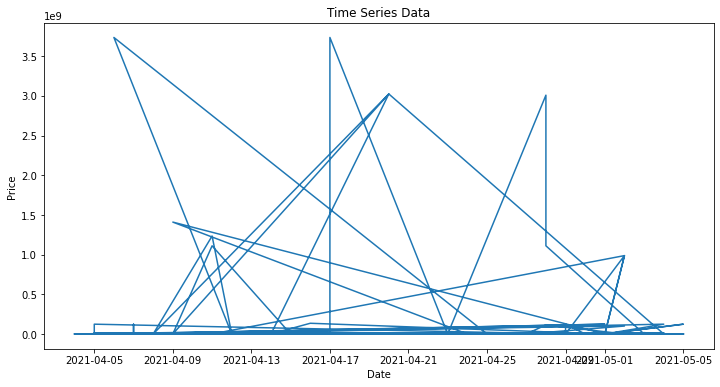

In [3]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(ts_data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [ ]:
# Perform Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts_data)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

In [ ]:
# Calculate first-order differencing
ts_diff = ts_data.diff().dropna()


In [ ]:
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(ts_diff, lags=40, ax=ax1)
plot_pacf(ts_diff, lags=40, ax=ax2)
plt.show()


In [ ]:
# Fit the ARIMA model
p, d, q = (2, 1, 2)  # Example values, adjust as needed
model = ARIMA(ts_data, order=(p, d, q))
results = model.fit()


In [ ]:
# Check model diagnostics
print(results.summary())


In [ ]:
# Forecast future values
forecast_steps = 10  # Example value
forecast, stderr, conf_int = results.forecast(steps=forecast_steps)
print("Forecasted values:", forecast)


In [ ]:
# Plot the original time series and forecast
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Original')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.plot(pd.date_range(start=ts_data.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, color='green', label='Forecast')
plt.fill_between(pd.date_range(start=ts_data.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast - 1.96 * stderr, forecast + 1.96 * stderr, color='green', alpha=0.2)
plt.title('Original Time Series and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
